# M061_2025_03_04_10_00 & M061_2025_03_06_14_00

In [1]:
import os
import sys
import importlib
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.decomposition import PCA

# pyaldata
sys.path.append("/home/zms24/Desktop") 
import PyalData.pyaldata as pyal # type:ignore

# tools functions
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../.."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from tools.curbd import curbd
from tools.dsp.preprocessing import preprocess
from tools.rnn_and_curbd import rnn as rnnz
from tools.rnn_and_curbd import plotting as pltz
from tools.rnn_and_curbd import model_analysis as analyz
from tools.rnn_and_curbd import curbd as curbdz

# Reload modules
importlib.reload(rnnz)
importlib.reload(pltz)
importlib.reload(analyz)
importlib.reload(curbdz)

np.random.seed(61)

color pallete

In [31]:
curbd_colors = {'M1': "#3681D2", 'SSp': '#f4a261', 'CP': "#8ed74d", 'VAL': '#e76f51'}
model_color = "#0000D0"
exp_color = '#232333'
trial_color = '#98fb98'
top_sol_color = "#ed6bbe"
bottom_sol_color = "#b66cea"
color_palette = {'curbd_colors': curbd_colors, 
                 'model_color': model_color, 
                 'exp_color': exp_color,
                 'trial_color': trial_color,
                 'top_sol_color': top_sol_color,
                 'bottom_sol_color': bottom_sol_color,
                 'solenoids':["#7c004e", "#9C0F69", "#d3409d", "#e74bae", "#fda0db", "#fec3e9", "#3e006a", "#611795", "#8335bb", "#aa63dc", "#d8a2ff", "#e2baff"]
                 }

### Load in rnn models and dfs

In [3]:
fname0 = 'rnn_model_M062_2025_03_19_14_00.mat'
fname1 = 'rnn_model_M062_2025_03_20_14_00.mat'
fname2 = 'rnn_model_M062_2025_03_21_14_00.mat'
path0 = os.path.join("/home/zms24/Desktop/rnn_models/", fname0)
path1 = os.path.join("/home/zms24/Desktop/rnn_models/", fname1)
path2 = os.path.join("/home/zms24/Desktop/rnn_models/", fname2)

data0 = loadmat(path0, simplify_cells=True)
data1 = loadmat(path1, simplify_cells=True)
data2 = loadmat(path2, simplify_cells=True)
rnn_model0 = data0['rnn_model']
rnn_model1 = data1['rnn_model']
rnn_model2 = data2['rnn_model']

In [4]:
pyal_dict0 = rnnz.process_pyal_M061_M062_files(fname0, rnn_model0)
pyal_dict1 = rnnz.process_pyal_M061_M062_files(fname1, rnn_model1)
pyal_dict2 = rnnz.process_pyal_M061_M062_files(fname2, rnn_model2)

array field all_KSLabel could not be converted to int.
array field VAL_KSLabel could not be converted to int.
array field SSp_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
field values_Sol_direction could not be converted to int.
field idx_Sol_direction could not be converted to int.
field values_Sol_duration could not be converted to int.
field idx_Sol_duration could not be converted to int.
field idx_sol_on could not be converted to int.
array field all_KSLabel could not be converted to int.
array field VAL_KSLabel could not be converted to int.
array field SSp_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
field values_before_camera_trigger could not be converted to int.
field idx_before_camera_trigger could not be converted to int.
array field all_KSLabel could not be converted to i

/home/zms24/Desktop/PyalData/pyaldata/utils.py:155: UserWarning: values_MotSen1_X might be a time-varying field. It matches the length of VAL_spikes on 99.86149584487535% of trials
  warnings.warn(
/home/zms24/Desktop/PyalData/pyaldata/utils.py:155: UserWarning: idx_MotSen1_X might be a time-varying field. It matches the length of VAL_spikes on 99.86149584487535% of trials
  warnings.warn(
/home/zms24/Desktop/PyalData/pyaldata/utils.py:155: UserWarning: values_MotSen1_Y might be a time-varying field. It matches the length of VAL_spikes on 99.86149584487535% of trials
  warnings.warn(
/home/zms24/Desktop/PyalData/pyaldata/utils.py:155: UserWarning: idx_MotSen1_Y might be a time-varying field. It matches the length of VAL_spikes on 99.86149584487535% of trials
  warnings.warn(
/home/zms24/Desktop/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/zms24/Desktop/PyalData/pyaldata/firing_rates.py:108

Combined every 3 bins
Resulting VAL_spikes ephys data shape is (NxT): (198, 200)
Resulting SSp_spikes ephys data shape is (NxT): (95, 200)
Resulting CP_spikes ephys data shape is (NxT): (307, 200)
Resulting MOp_spikes ephys data shape is (NxT): (210, 200)
Trial length: 200
field values_before_camera_trigger could not be converted to int.
field idx_before_camera_trigger could not be converted to int.
array field VAL_KSLabel could not be converted to int.
array field SSp_KSLabel could not be converted to int.
array field all_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
array field VAL_KSLabel could not be converted to int.
array field SSp_KSLabel could not be converted to int.
array field all_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
field values_Sol_direction could not be converted

/home/zms24/Desktop/PyalData/pyaldata/utils.py:155: UserWarning: values_MotSen1_X might be a time-varying field. It matches the length of VAL_spikes on 99.85955056179775% of trials
  warnings.warn(
/home/zms24/Desktop/PyalData/pyaldata/utils.py:155: UserWarning: idx_MotSen1_X might be a time-varying field. It matches the length of VAL_spikes on 99.85955056179775% of trials
  warnings.warn(
/home/zms24/Desktop/PyalData/pyaldata/utils.py:155: UserWarning: values_MotSen1_Y might be a time-varying field. It matches the length of VAL_spikes on 99.85955056179775% of trials
  warnings.warn(
/home/zms24/Desktop/PyalData/pyaldata/utils.py:155: UserWarning: idx_MotSen1_Y might be a time-varying field. It matches the length of VAL_spikes on 99.85955056179775% of trials
  warnings.warn(
/home/zms24/Desktop/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/zms24/Desktop/PyalData/pyaldata/firing_rates.py:108

Combined every 3 bins
Resulting VAL_spikes ephys data shape is (NxT): (155, 200)
Resulting SSp_spikes ephys data shape is (NxT): (118, 200)
Resulting MOp_spikes ephys data shape is (NxT): (163, 200)
Resulting CP_spikes ephys data shape is (NxT): (356, 200)
Trial length: 200
field values_before_camera_trigger could not be converted to int.
field idx_before_camera_trigger could not be converted to int.
array field VAL_KSLabel could not be converted to int.
array field SSp_KSLabel could not be converted to int.
array field all_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
field values_Sol_direction could not be converted to int.
field idx_Sol_direction could not be converted to int.
field values_Sol_duration could not be converted to int.
field idx_Sol_duration could not be converted to int.
field idx_sol_on could not be converted to int.
array field VAL_KSLabel could not be converted to 

/home/zms24/Desktop/PyalData/pyaldata/utils.py:155: UserWarning: values_MotSen1_X might be a time-varying field. It matches the length of VAL_spikes on 99.85875706214689% of trials
  warnings.warn(
/home/zms24/Desktop/PyalData/pyaldata/utils.py:155: UserWarning: idx_MotSen1_X might be a time-varying field. It matches the length of VAL_spikes on 99.85875706214689% of trials
  warnings.warn(
/home/zms24/Desktop/PyalData/pyaldata/utils.py:155: UserWarning: values_MotSen1_Y might be a time-varying field. It matches the length of VAL_spikes on 99.85875706214689% of trials
  warnings.warn(
/home/zms24/Desktop/PyalData/pyaldata/utils.py:155: UserWarning: idx_MotSen1_Y might be a time-varying field. It matches the length of VAL_spikes on 99.85875706214689% of trials
  warnings.warn(
/home/zms24/Desktop/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
/home/zms24/Desktop/PyalData/pyaldata/firing_rates.py:108

Combined every 3 bins
Resulting VAL_spikes ephys data shape is (NxT): (122, 200)
Resulting SSp_spikes ephys data shape is (NxT): (66, 200)
Resulting CP_spikes ephys data shape is (NxT): (280, 200)
Resulting MOp_spikes ephys data shape is (NxT): (179, 200)
Trial length: 200


#### Correction

In [5]:
# arr = pyal_dict1['regions_arr']
# filtered_arr = arr[arr[:, 0] != 'GPe']
# pyal_dict1['regions_arr'] = filtered_arr

### Model accuracy analysis

In [6]:
def model_input_ouput_plt(rnn_model, reset_points, mouse_number, color_palette):
    rnn_model_ = rnn_model.copy()
    rnn_model_['RNN'] = rnnz.combine_rnn_time_bins(rnn_model)
    dtFactor = rnn_model['params']['dtFactor']
    reset_points = [point/dtFactor for point in reset_points if point/dtFactor <= rnn_model_['RNN'].shape[1]]

    Adata = rnn_model_['Adata']  # shape: neurons x time → transpose for plotting
    RNNdata = rnn_model_['RNN']

    time_points = Adata.shape[1]
    tick_step = 200  # Adjust as needed

    fig = plt.figure(figsize=(12, 6))
    gs = gridspec.GridSpec(2, 2, width_ratios=[30, 1], height_ratios=[1, 1], wspace=0.05, hspace=0.2)

    vmin = min(Adata.min(), RNNdata.min())
    vmax = max(Adata.max(), RNNdata.max())

    # Experimental
    ax0 = fig.add_subplot(gs[0, 0])
    im0 = ax0.pcolormesh(Adata, cmap='viridis', shading='auto', vmin=vmin, vmax=vmax)
    for x in reset_points:
        ax0.axvline(x=x, color=color_palette['trial_color'], linestyle='--', linewidth=1)
    ax0.set_title(f"Mouse {mouse_number}")
    ax0.set_ylabel('Neurons')
    ax0.set_xticks(np.arange(0, time_points, tick_step))
    ax0.set_xticklabels(np.arange(0, time_points, tick_step))  # hide x tick labels on top

    # RNN model
    ax1 = fig.add_subplot(gs[1, 0])
    im1 = ax1.pcolormesh(RNNdata, cmap='viridis', shading='auto', vmin=vmin, vmax=vmax)
    for x in reset_points:
        ax1.axvline(x=x, color=color_palette['trial_color'], linestyle='--', linewidth=1)
    ax1.set_xlabel('Time Points')
    ax1.set_ylabel('Neurons')
    ax1.set_xticks(np.arange(0, time_points, tick_step))

    # Shared colorbar
    cbar_ax = fig.add_subplot(gs[:, 1])
    cbar = fig.colorbar(im1, cax=cbar_ax)
    cbar.set_label('Firing rate')

    plt.show()

RNN model output transformed from shape: (810, 4799) to (810, 2400). Matching the original data shape of (810, 2400)


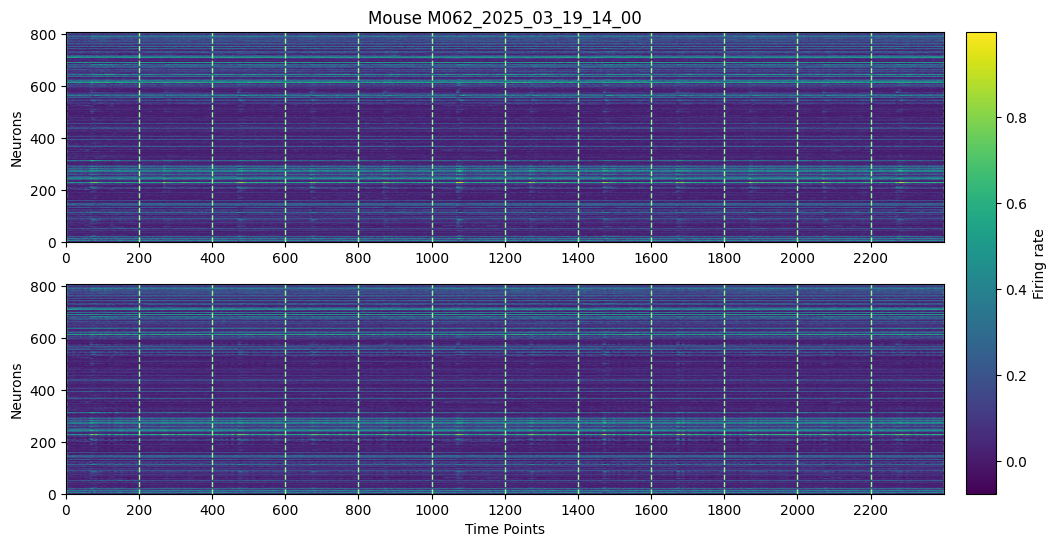

RNN model output transformed from shape: (792, 4799) to (792, 2400). Matching the original data shape of (792, 2400)


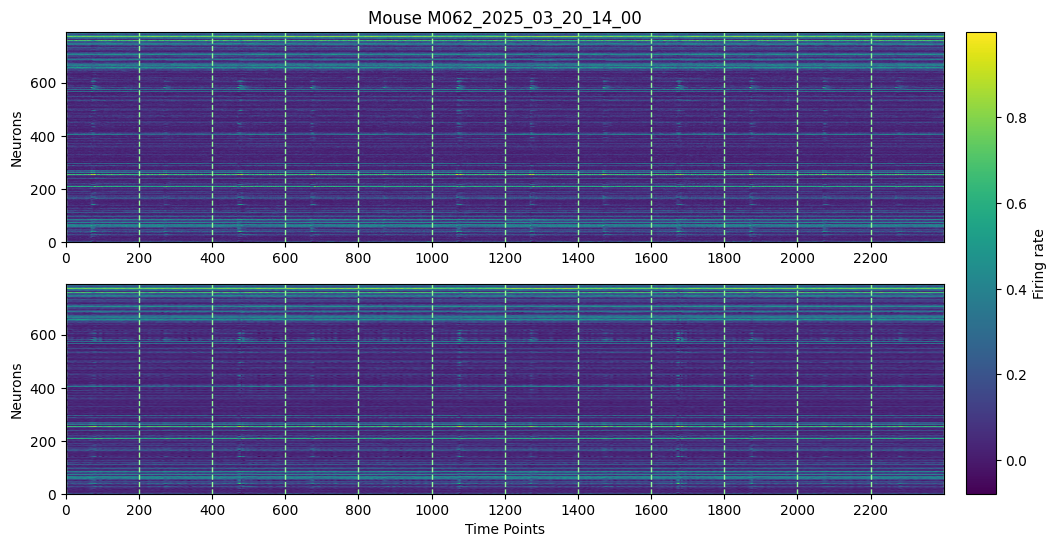

RNN model output transformed from shape: (647, 4799) to (647, 2400). Matching the original data shape of (647, 2400)


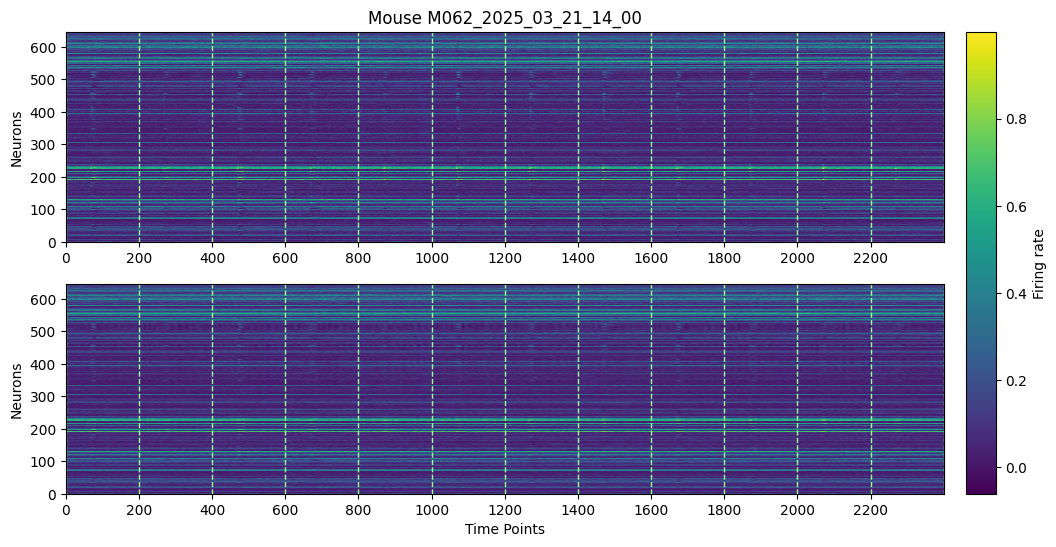

In [7]:
model_input_ouput_plt(rnn_model0, pyal_dict0['reset_points'],'M062_2025_03_19_14_00', color_palette)
model_input_ouput_plt(rnn_model1, pyal_dict1['reset_points'],'M062_2025_03_20_14_00', color_palette)
model_input_ouput_plt(rnn_model2, pyal_dict2['reset_points'],'M062_2025_03_21_14_00', color_palette)

### plot just a section

In [8]:
def model_input_ouput_trimmed_plt(rnn_model, reset_points, perturabtion_time_sec, mouse_number, color_palette, bin_size):
    rnn_model_ = rnn_model.copy()
    rnn_model_['RNN'] = rnnz.combine_rnn_time_bins(rnn_model)
    dtFactor = rnn_model['params']['dtFactor']
    reset_points_bins = [point/dtFactor for point in reset_points if point/dtFactor <= rnn_model_['RNN'].shape[1]]

    Adata = rnn_model_['Adata']
    RNNdata = rnn_model_['RNN']

    time_points = Adata.shape[1]
    tick_step = 200

    fig = plt.figure(figsize=(12, 6))
    gs = gridspec.GridSpec(2, 2, width_ratios=[30, 1], height_ratios=[1, 1], wspace=0.05, hspace=0.2)

    vmin, vmax = 0, 1  # fix color range 0-1 (optional, based on previous convo)

    ax0 = fig.add_subplot(gs[0, 0])
    im0 = ax0.pcolormesh(Adata, cmap='viridis', shading='auto', vmin=vmin, vmax=vmax)
    
    # Plot reset points lines (existing, e.g. trial start)
    for x in reset_points_bins:
        ax0.axvline(x=x, color=color_palette['trial_color'], linestyle='--', linewidth=1)
    
    # Plot perturbation lines in red
    for x_bin in reset_points_bins:
        pert_bin = x_bin + perturabtion_time_sec / bin_size  # convert perturbation time from sec to bins
        ax0.axvline(x=pert_bin, color='red', linestyle='--', linewidth=1)

    ax0.set_title(f"Mouse {mouse_number}")
    ax0.set_ylabel('Neurons')
    xticks = np.arange(0, time_points, tick_step)
    ax0.set_xticks(xticks)
    ax0.set_xticklabels((xticks * bin_size).astype(int))
    ax0.set_xlim(180, 800)

    ax1 = fig.add_subplot(gs[1, 0])
    im1 = ax1.pcolormesh(RNNdata, cmap='viridis', shading='auto', vmin=vmin, vmax=vmax)
    
    # Same lines for ax1
    for x in reset_points_bins:
        ax1.axvline(x=x, color=color_palette['trial_color'], linestyle='--', linewidth=1)
    for x_bin in reset_points_bins:
        pert_bin = x_bin + perturabtion_time_sec / bin_size
        ax1.axvline(x=pert_bin, color='red', linestyle='--', linewidth=1)
    
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Neurons')
    ax1.set_xticks(xticks)
    ax1.set_xticklabels((xticks * bin_size).astype(int))
    ax1.set_xlim(180, 800)

    cbar_ax = fig.add_subplot(gs[:, 1])
    cbar = fig.colorbar(im1, cax=cbar_ax)
    cbar.set_label('Firing rate')

    plt.show()

RNN model output transformed from shape: (810, 4799) to (810, 2400). Matching the original data shape of (810, 2400)


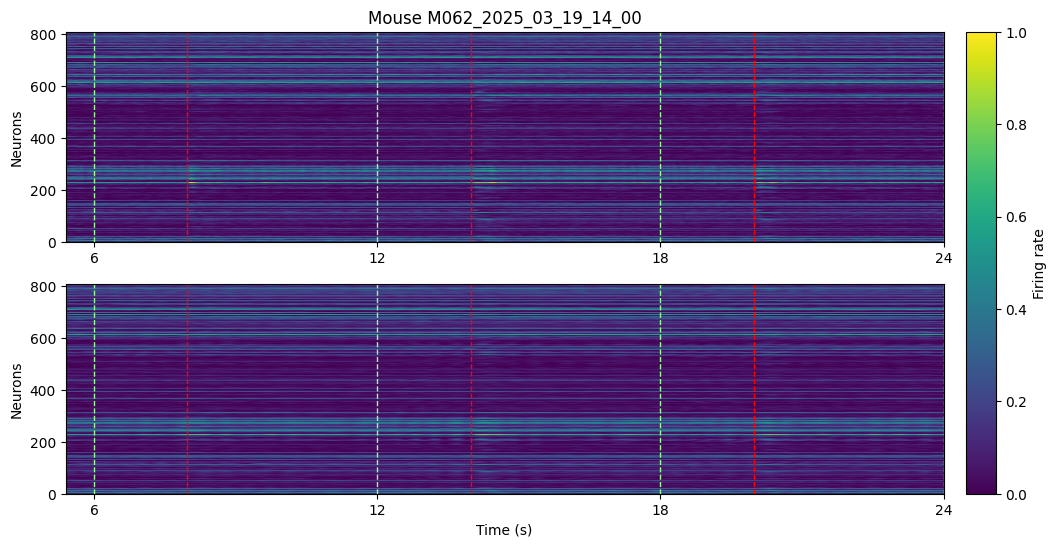

In [9]:
model_input_ouput_trimmed_plt(rnn_model0, pyal_dict0['reset_points'], pyal_dict0['perturbation_time_sec'],'M062_2025_03_19_14_00', color_palette, 0.03)

In [10]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

def model_input_ouput_trimmed_plt(rnn_model, reset_points, perturabtion_time_sec, mouse_number, color_palette, bin_size):
    rnn_model_ = rnn_model.copy()
    rnn_model_['RNN'] = rnnz.combine_rnn_time_bins(rnn_model)
    dtFactor = rnn_model['params']['dtFactor']
    reset_points_bins = [point/dtFactor for point in reset_points if point/dtFactor <= rnn_model_['RNN'].shape[1]]

    Adata = rnn_model_['Adata']
    RNNdata = rnn_model_['RNN']

    time_points = Adata.shape[1]
    tick_step = 200

    # Create a GridSpec with 3 rows, 2 columns (2 columns for heatmaps + colorbar)
    # height_ratios: bigger for heatmaps, smaller for firing rate plot
    fig = plt.figure(figsize=(8, 6), dpi=150)
    gs = gridspec.GridSpec(3, 2, width_ratios=[30, 1], height_ratios=[1, 1, 0.5], wspace=0.05, hspace=0.3)

    vmin, vmax = 0, 1  # fixed color scale for heatmaps

    # First heatmap: Adata
    ax0 = fig.add_subplot(gs[0, 0])
    im0 = ax0.pcolormesh(Adata, cmap='viridis', shading='auto', vmin=vmin, vmax=vmax)
    for x in reset_points_bins:
        ax0.axvline(x=x, color=color_palette['trial_color'], linestyle='--', linewidth=1)
    for x_bin in reset_points_bins:
        pert_bin = x_bin + perturabtion_time_sec / bin_size
        ax0.axvline(x=pert_bin, color='red', linestyle='--', linewidth=1)
    # ax0.set_title(f"Mouse {mouse_number}")
    # ax0.set_ylabel('Neurons')
    xticks = np.arange(0, time_points, tick_step)
    ax0.set_xticks(xticks)
    ax0.set_xticklabels((xticks * bin_size).astype(int))
    ax0.set_xlim(380, 1000)

    # Second heatmap: RNNdata
    ax1 = fig.add_subplot(gs[1, 0])
    im1 = ax1.pcolormesh(RNNdata, cmap='viridis', shading='auto', vmin=vmin, vmax=vmax)
    for x in reset_points_bins:
        ax1.axvline(x=x, color=color_palette['trial_color'], linestyle='--', linewidth=1)
    for x_bin in reset_points_bins:
        pert_bin = x_bin + perturabtion_time_sec / bin_size
        ax1.axvline(x=pert_bin, color='red', linestyle='--', linewidth=1)
    # ax1.set_xlabel('Time (s)')
    # ax1.set_ylabel('Neurons')
    ax1.set_xticks(xticks)
    ax1.set_xticklabels((xticks * bin_size).astype(int))
    ax1.set_xlim(380, 1000)

    # Colorbar shared for both heatmaps
    cbar_ax = fig.add_subplot(gs[0, 1])
    cbar = fig.colorbar(im1, cax=cbar_ax)
    # cbar.set_label('Firing rate')

    # Third subplot: firing rate plot
    ax2 = fig.add_subplot(gs[2, 0])
    firing_rate_model = RNNdata.mean(axis=0) / bin_size
    firing_rate_real = Adata.mean(axis=0) / bin_size

    ax2.plot(firing_rate_real, label="Experimental Data", color = color_palette['exp_color'])
    ax2.plot(firing_rate_model, label="Model", color = color_palette['model_color'])
    # ax2.plot(firing_rate_real, label="Experimental Data", color = color_palette['exp_color'])

    for trial in reset_points_bins:
        ax2.axvline(x=trial, color=color_palette['trial_color'], linestyle='--', linewidth=1)
        pert_bin = trial + perturabtion_time_sec / bin_size
        ax2.axvline(x=pert_bin, color='red', linestyle='--', linewidth=1)

    # ax2.set_xlim(180, 800)
    # ax2.set_xlabel('Time (s)')
    # ax2.set_ylabel('Firing rate')
    ax2.set_xticks(xticks)
    ax2.set_xticklabels((xticks * bin_size).astype(int))
    ax2.legend(loc='best', frameon=False, fontsize = 12, bbox_to_anchor=(1.05, 1),)
    # ax2.set_title('Firing Rate over Time')
    ax2.set_xlim(380, 1000)

    plt.show()


RNN model output transformed from shape: (647, 4799) to (647, 2400). Matching the original data shape of (647, 2400)


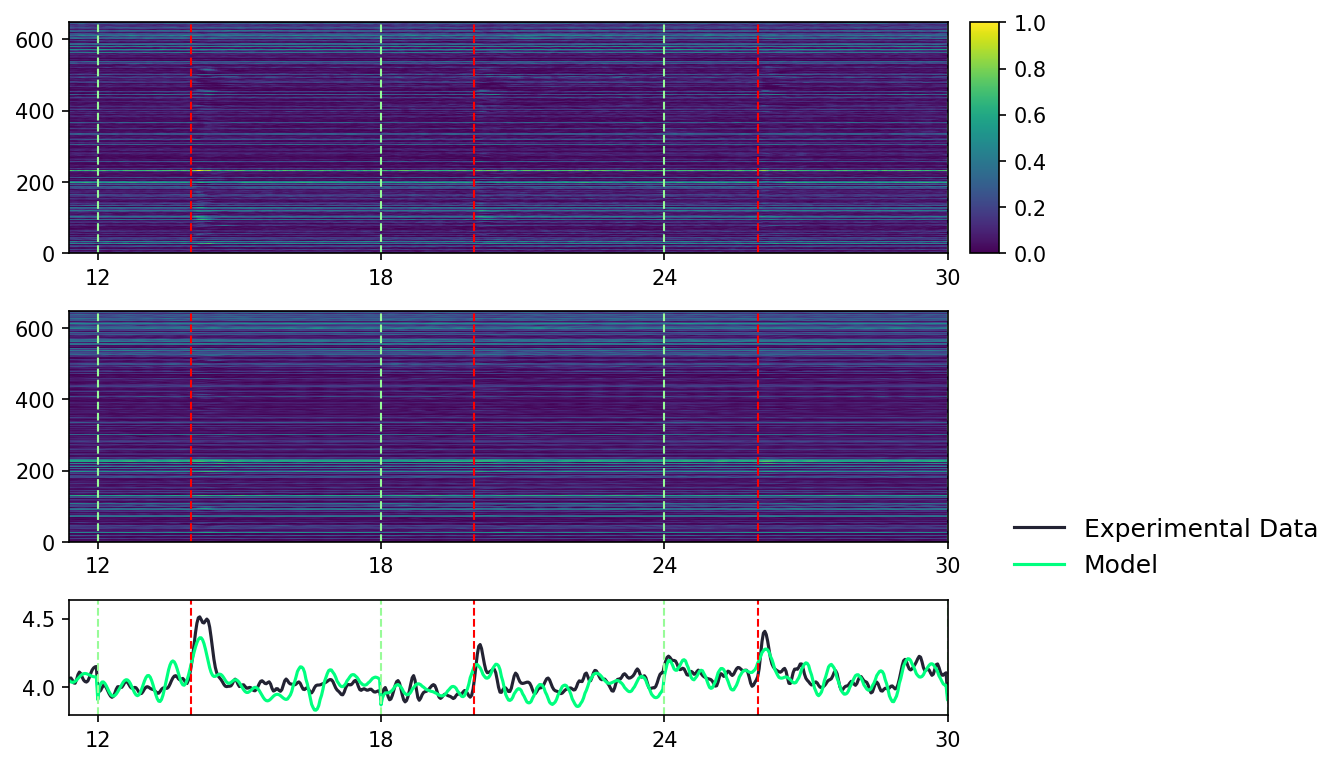

In [11]:
model_input_ouput_trimmed_plt(rnn_model2, pyal_dict2['reset_points'], pyal_dict2['perturbation_time_sec'],'M062_2025_03_21_14_00', color_palette, 0.03)

## PCA

In [12]:
def plot_pca_cum_var(pca_real, pca_rnn, session_num, colors):
    fig = plt.figure(figsize=(4, 3))
    plt.plot(np.cumsum(pca_real.explained_variance_ratio_), label='Experimental', color=colors['exp_color'])
    plt.plot(np.cumsum(pca_rnn.explained_variance_ratio_), label='RNN model',  color=colors['model_color'])

    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title(f'Session {session_num}')
    plt.ylim(0, 1)
    plt.legend()
    plt.show()

def cumulative_variance_plt(rnn_model, color_palette, mouse_num):
    rnn_model_ = rnn_model.copy()
    rnn_model_['RNN'] = rnnz.combine_rnn_time_bins(rnn_model)

    rnn_activity = rnn_model_['RNN'].T
    real_activity = rnn_model_['Adata'].T
    num_components = 100

    pca_real, pca_data_real = analyz.pca_fit_transform(real_activity, num_components)
    pca_rnn, pca_data_rnn = analyz.pca_fit_transform(rnn_activity, num_components)

    plot_pca_cum_var(pca_real, pca_rnn, mouse_num, color_palette)

RNN model output transformed from shape: (810, 4799) to (810, 2400). Matching the original data shape of (810, 2400)


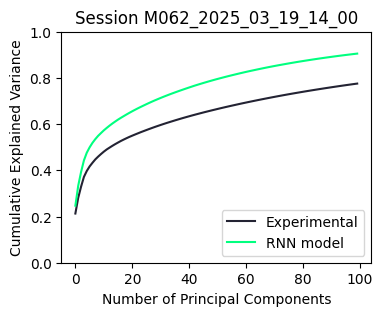

RNN model output transformed from shape: (792, 4799) to (792, 2400). Matching the original data shape of (792, 2400)


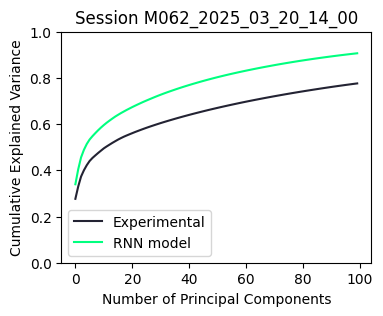

RNN model output transformed from shape: (647, 4799) to (647, 2400). Matching the original data shape of (647, 2400)


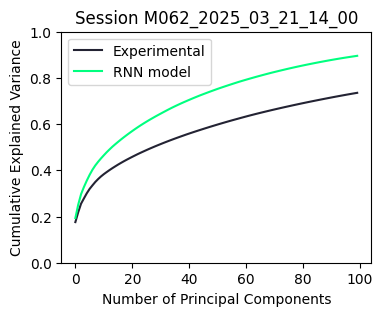

In [13]:
cumulative_variance_plt(rnn_model0, color_palette, 'M062_2025_03_19_14_00')
cumulative_variance_plt(rnn_model1, color_palette, 'M062_2025_03_20_14_00')
cumulative_variance_plt(rnn_model2, color_palette, 'M062_2025_03_21_14_00')

In [14]:
def plot_3pcs(fig, data, subplot_num, trial_labels, title, color_palette):
    ax1 = fig.add_subplot(subplot_num, projection='3d', aspect='equal')

    handles = []
    labels = []

    for trial in range(data.shape[0]):
        line, = ax1.plot(data[trial, :, 0],
                         data[trial, :, 1],
                         data[trial, :, 2], 
                         color=color_palette['solenoids'][trial],
                         label=trial_labels[trial])
        handles.append(line)
        labels.append(trial_labels[trial])

    ax1.set_title(title)
    ax1.set_xlabel('PC1')
    ax1.set_ylabel('PC2')
    ax1.set_zlabel('PC3')

    return handles, labels

def plot_2d_pcs(ax, data, trial_labels, title, color_palette, pc_x=0, pc_y=1):
    handles = []
    for trial in range(data.shape[0]):
        h, = ax.plot(
            data[trial, :, pc_x],
            data[trial, :, pc_y],
            label=trial_labels[trial],
            color=color_palette['solenoids'][trial]
        )
        handles.append(h)

    ax.set_title(title)
    ax.set_xlabel(f"PC{pc_x + 1}", fontsize = 16)
    ax.set_ylabel(f"PC{pc_y + 1}", fontsize = 16)

    # Minimalist style
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

    return handles, trial_labels

def plot_pca(real_data, rnn_data, original_shapes, trial_labels, color_palette, mouse_num):
    reconstructed_data_avg = np.split(real_data, np.cumsum(original_shapes)[:-1])
    reconstructed_rnn = np.split(rnn_data, np.cumsum(original_shapes)[:-1])

    def try_convert_to_array(data_list, label="Data"):
        shapes = [d.shape for d in data_list]
        if len(set(shapes)) == 1:
            return np.array(data_list)
        else:
            print(f"Warning: {label} has inconsistent shapes, returning list instead.")
            return data_list

    reconstructed_data_avg = try_convert_to_array(reconstructed_data_avg, label="Recorded data")
    reconstructed_rnn = try_convert_to_array(reconstructed_rnn, label="RNN data")
    fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

    # Convert data
    reconstructed_data_avg = try_convert_to_array(reconstructed_data_avg, label="Recorded data")
    reconstructed_rnn = try_convert_to_array(reconstructed_rnn, label="RNN data")

    # Plot on subplots and get handles/labels
    handles1, labels1 = plot_2d_pcs(axes[0], reconstructed_data_avg, trial_labels, "Experimental", color_palette)
    handles2, labels2 = plot_2d_pcs(axes[1], reconstructed_rnn, trial_labels, "RNN Model", color_palette)

    # Use handles from one (they're the same)
    fig.legend(handles1, labels1, loc='center right', bbox_to_anchor=(1.12, 0.5), title="Trial Labels")

    plt.tight_layout()
    plt.suptitle(f"Session {mouse_num}")
    plt.show()

    ## 3D option ##

    # fig = plt.figure(figsize=(12, 5))

    # # Get handles/labels from both subplots
    # handles1, labels1 = plot_3pcs(fig, reconstructed_data_avg, 121, trial_labels, 'Experimental', color_palette)
    # handles2, labels2 = plot_3pcs(fig, reconstructed_rnn, 122, trial_labels, 'RNN model', color_palette)

    # # Use handles from the first plot (assumes same labels)
    # fig.legend(handles1, labels1, loc='center right', bbox_to_anchor=(1.1, 0.5), title="Trial Labels")

    # plt.suptitle(f'Session {mouse_num}', fontsize=16)
    # # plt.tight_layout(rect=[0, 0, 0.9, 1])  # leave space on the right for legend
    # plt.show()

def three_pca_plt(rnn_model, pyal_dict, color_palette, mouse_num):
    rnn_model_ = rnn_model.copy()
    rnn_model_['RNN'] = rnnz.combine_rnn_time_bins(rnn_model)
    print(rnn_model_['RNN'].shape)

    rnn_activity = rnn_model_['RNN'].T
    real_activity = rnn_model_['Adata'].T
    num_components = 100

    pca_real, pca_data_real = analyz.pca_fit_transform(real_activity, num_components)
    pca_rnn, pca_data_rnn = analyz.pca_fit_transform(rnn_activity, num_components)

    _ = plot_pca(pca_data_real, pca_data_rnn, pyal_dict['shapes'], pyal_dict['trial_labels'], color_palette, mouse_num) 

RNN model output transformed from shape: (810, 4799) to (810, 2400). Matching the original data shape of (810, 2400)
(810, 2400)


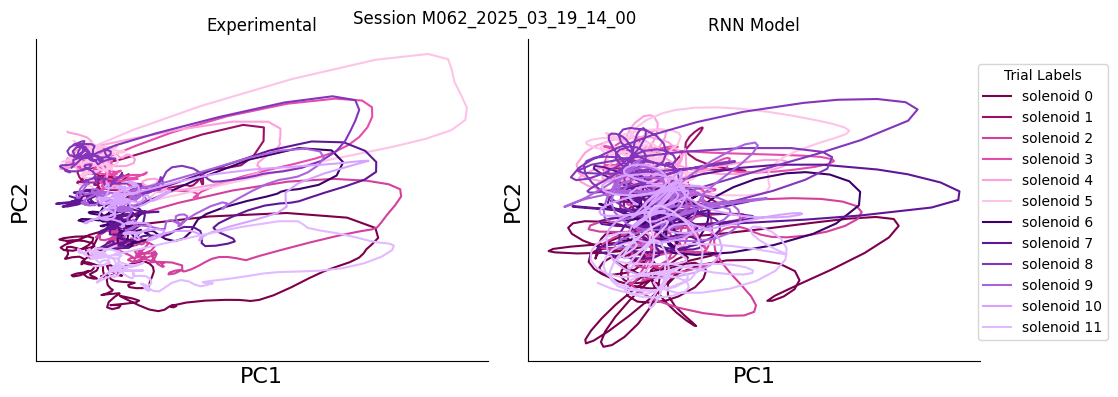

RNN model output transformed from shape: (792, 4799) to (792, 2400). Matching the original data shape of (792, 2400)
(792, 2400)


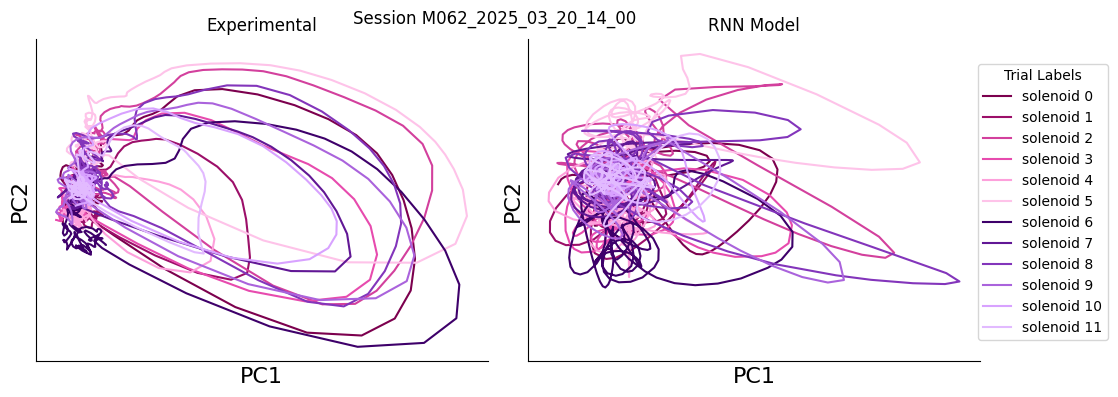

RNN model output transformed from shape: (647, 4799) to (647, 2400). Matching the original data shape of (647, 2400)
(647, 2400)


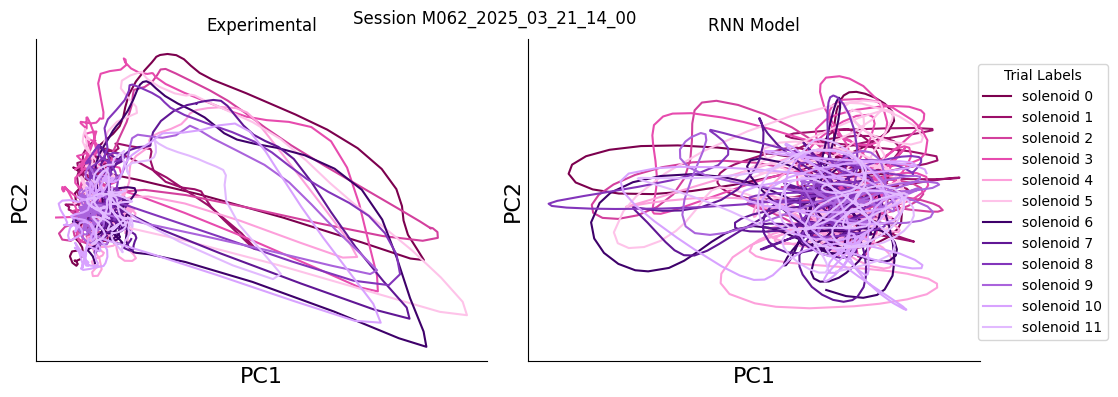

In [15]:
three_pca_plt(rnn_model0, pyal_dict0, color_palette, 'M062_2025_03_19_14_00')
three_pca_plt(rnn_model1, pyal_dict1, color_palette, 'M062_2025_03_20_14_00')
three_pca_plt(rnn_model2, pyal_dict2, color_palette, 'M062_2025_03_21_14_00')

## PCA by region

In [32]:
def plot_pca_by_region(real_data, rnn_data, original_shapes, regions, colours, mouse_num):
    num_plots = len(regions)
    labels = regions[:, 0]
    re_real_data = []
    re_rnn_data = []

    for r in range(len(regions)):
        re_real = np.split(real_data[r], np.cumsum(original_shapes)[:-1])
        re_rnn = np.split(rnn_data[r], np.cumsum(original_shapes)[:-1])

        # Try to convert to arrays if shapes match
        def safe_mean(trial_list):
            shapes = [arr.shape for arr in trial_list]
            if len(set(shapes)) == 1:
                return np.mean(np.array(trial_list), axis=0)
            else:
                print(f"Warning: Inconsistent trial lengths in region {labels[r]}; averaging manually.")
                # Truncate all to min length
                min_len = min(arr.shape[0] for arr in trial_list)
                truncated = np.array([arr[:min_len] for arr in trial_list])
                return np.mean(truncated, axis=0)

        mean_real = safe_mean(re_real)
        mean_rnn = safe_mean(re_rnn)

        re_real_data.append(mean_real)
        re_rnn_data.append(mean_rnn)

    fig = plt.figure(figsize=(6, 1.75), dpi =300)
    for r in range(num_plots):
        axn = fig.add_subplot(1, num_plots, r + 1)
        axn.plot(re_real_data[r][:, 0], re_real_data[r][:, 1], label='Experimental', linestyle='--', linewidth=2, color=colours['exp_color'])
        axn.plot(re_rnn_data[r][:, 0], re_rnn_data[r][:, 1], label='RNN model', linewidth=2, color=colours['model_color'])
        # axn.set_xlabel('PC1')
        # axn.set_ylabel('PC2')
        # axn.legend(fontsize=10, loc='upper left')
        # axn.set_title(f"{labels[r]} activity", fontsize='xx-large')
        axn.spines['top'].set_visible(False)
        axn.spines['right'].set_visible(False)
        axn.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)

    # fig.suptitle(f"Session {mouse_num}", fontsize=16)
    fig.tight_layout()
    return fig

def pca_by_region(data, regions):
    num_regions = len(regions)
    PCA_data = []
    pcas = []
    for r in range(num_regions):
        # select region data
        neurons = len(regions[r][1])
        first_idx = regions[r][1][0]
        last_idx = regions[r][1][-1]
        region_data = data[:, first_idx:last_idx, ]
        # PCA and save
        pca = PCA(n_components=neurons - 1)
        PCA_data.append(pca.fit_transform(region_data))
        pcas.append(pca)

    return PCA_data, pcas

def pca_regions_plt(rnn_model, pyal_dict, color_palette, mouse_num):
    rnn_model_ = rnn_model.copy()
    rnn_model_['RNN'] = rnnz.combine_rnn_time_bins(rnn_model)

    rnn_activity = rnn_model_['RNN'].T
    real_activity = rnn_model_['Adata'].T

    PCA_data_real, pcas_real = pca_by_region(real_activity, pyal_dict['regions_arr'])
    PCA_data_rnn, pcas_rnn = pca_by_region(rnn_activity, pyal_dict['regions_arr']) 
    _ = plot_pca_by_region(PCA_data_real, PCA_data_rnn, pyal_dict['shapes'], pyal_dict['regions_arr'], color_palette, mouse_num)   

RNN model output transformed from shape: (810, 4799) to (810, 2400). Matching the original data shape of (810, 2400)
RNN model output transformed from shape: (792, 4799) to (792, 2400). Matching the original data shape of (792, 2400)
RNN model output transformed from shape: (647, 4799) to (647, 2400). Matching the original data shape of (647, 2400)


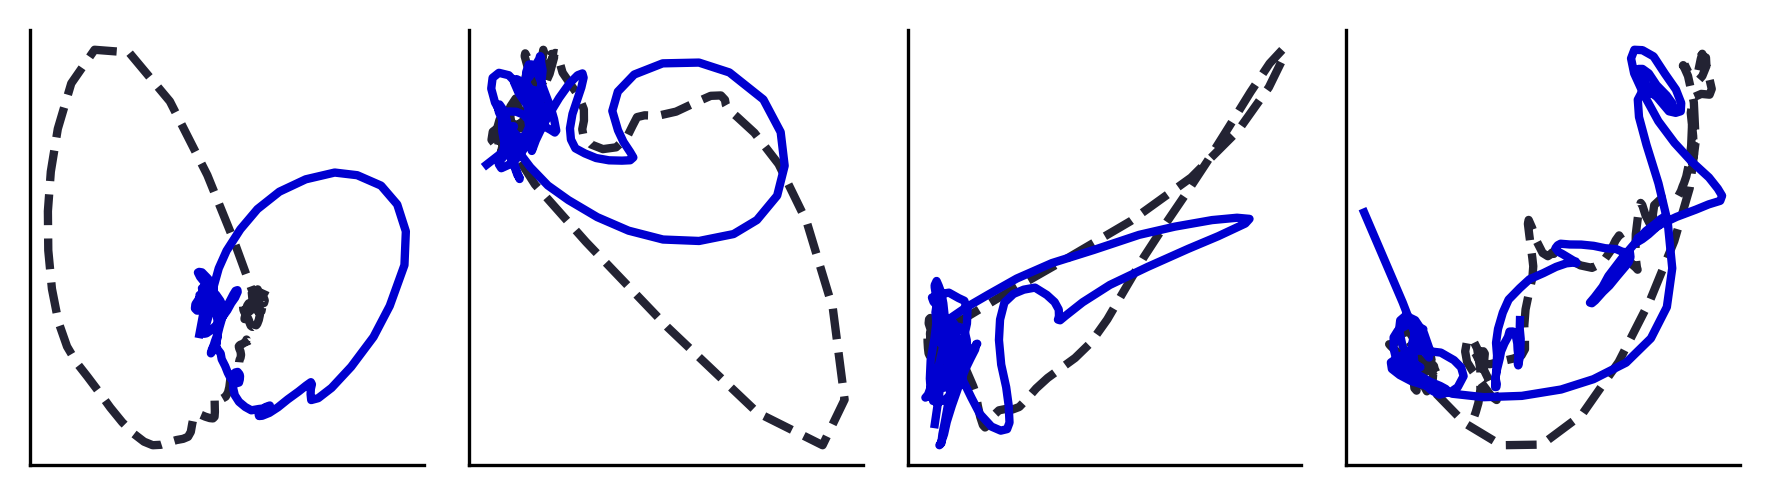

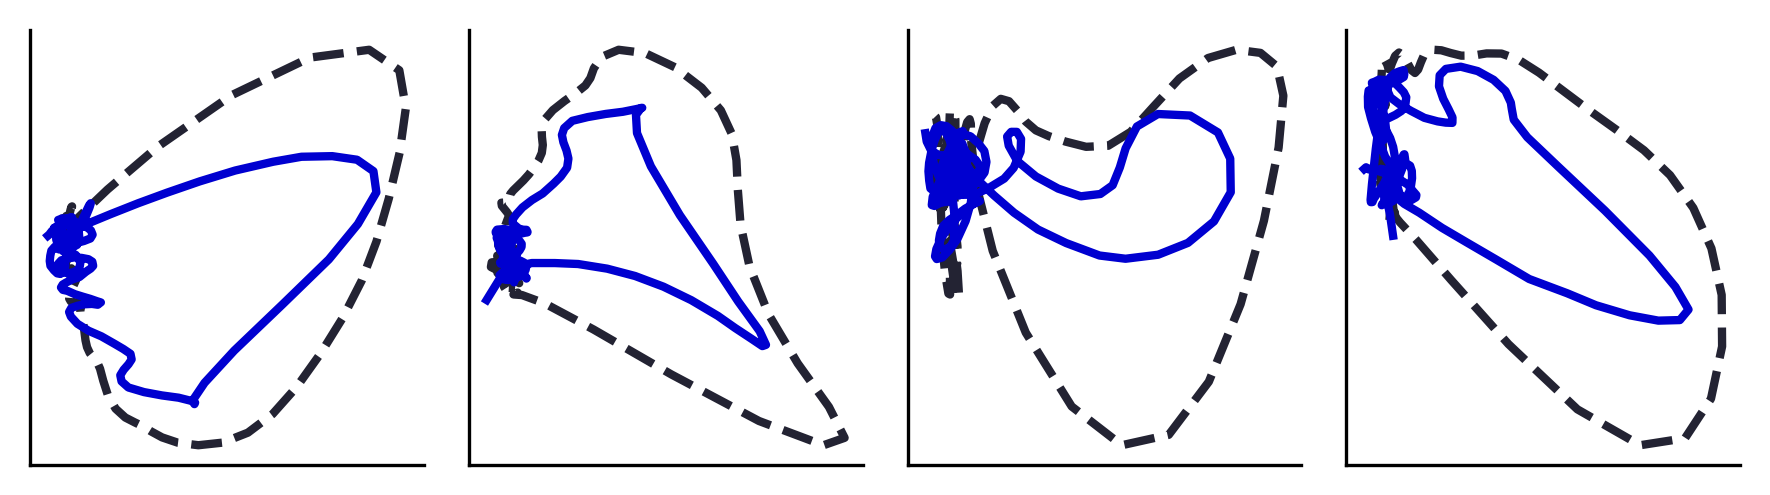

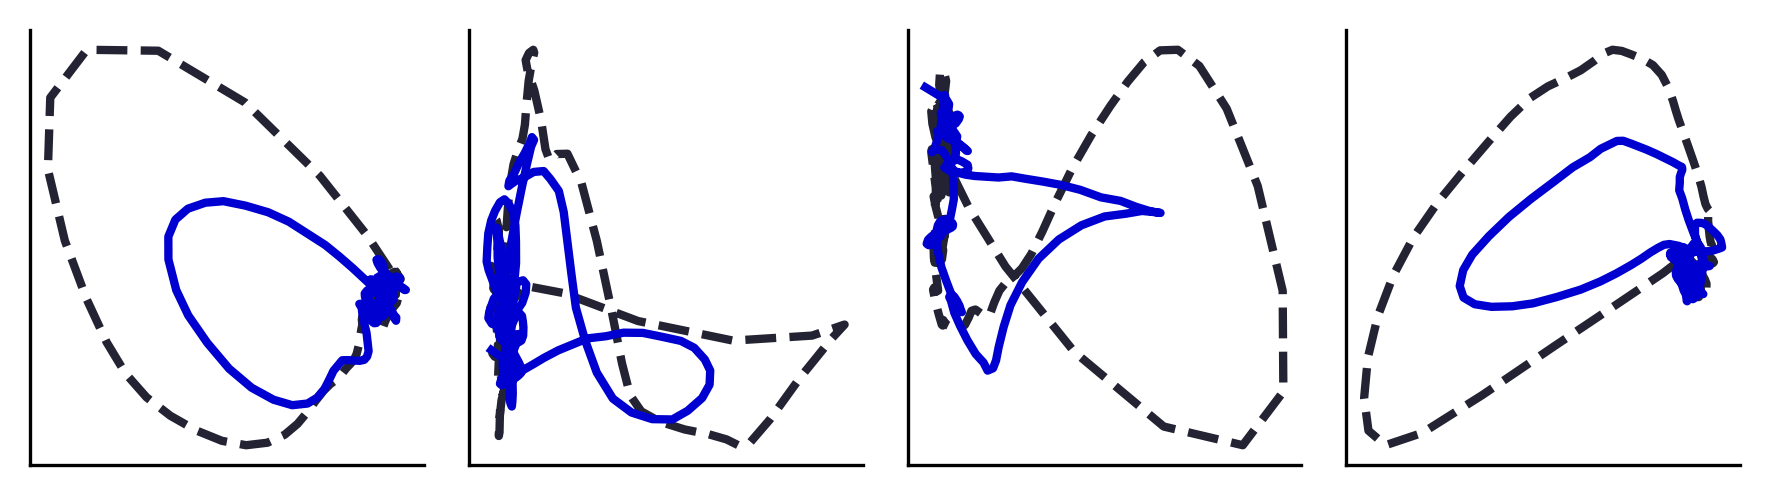

In [33]:
pca_regions_plt(rnn_model0, pyal_dict0, color_palette, 'M061_2025_03_04_10_00')
pca_regions_plt(rnn_model1, pyal_dict1, color_palette, 'M061_2025_03_06_14_00')
pca_regions_plt(rnn_model2, pyal_dict2, color_palette, 'M061_2025_03_06_14_00')

## Matrix and weight distrbution

In [18]:
def plot_rnn_weight_matrix(rnn_model, regions, session):
    matrix = rnn_model['J']
    neuron_num = rnn_model['RNN'].shape[0]

    # Extract boundaries dynamically
    boundaries = [region[1][-1] for region in regions]

    fig, ax = plt.subplots(figsize=[4, 3])
    cax = ax.pcolormesh(range(neuron_num), range(neuron_num), matrix, cmap="viridis")
    fig.colorbar(cax, label="Weight Strength")

    # Plot region boundaries
    for boundary in boundaries:
        ax.axvline(x=boundary + 0.5, color='red', linestyle='--', linewidth=0.5)
        ax.axhline(y=boundary + 0.5, color='red', linestyle='--', linewidth=0.5)

    # Compute midpoints for labels
    midpoints = [boundaries[0] / 2] + [(boundaries[i - 1] + boundaries[i]) / 2 for i in range(1, len(boundaries))]
    region_labels = [region[0] for region in regions]

    # Set axis labels dynamically
    ax.set_xticks(midpoints)
    ax.set_xticklabels(region_labels)
    ax.set_yticks(midpoints)
    ax.set_yticklabels(region_labels)

    # ax.set_title(f'RNN weight matrix - {session}')
    ax.set_xlabel('target neuron')
    ax.set_ylabel('source neuron')

    return fig

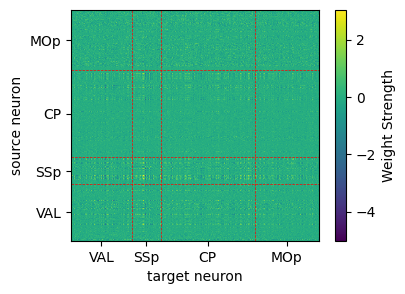

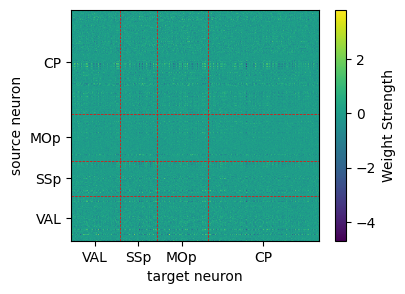

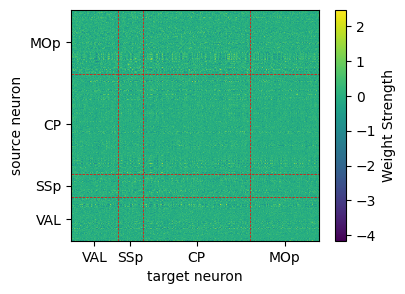

In [19]:
weight_matrix_fig0 = plot_rnn_weight_matrix(rnn_model0, pyal_dict0['regions_arr'], "M061_2025_03_04_10_00")
weight_matrix_fig1 = plot_rnn_weight_matrix(rnn_model1, pyal_dict1['regions_arr'], "M061_2025_03_06_14_00")
weight_matrix_fig1 = plot_rnn_weight_matrix(rnn_model2, pyal_dict2['regions_arr'], "M061_2025_03_06_14_00")

In [29]:
def plot_rnn_weight_matrix(rnn_model, regions, session):
    matrix = rnn_model['J'][:100, :100]
    # matrix_learned = rnn_model['J']
    neuron_num = rnn_model['RNN'].shape[0]
    neuron_num = 100

    # Extract boundaries dynamically
    # boundaries = [region[1][-1] for region in regions]

    fig, ax = plt.subplots(figsize=[3, 2], dpi = 150)
    cax = ax.pcolormesh(range(neuron_num), range(neuron_num), matrix, cmap="viridis")
    # cax.set_lim(min(matrix_learned), max(matrix_learned))
    fig.colorbar(cax, label="Weight Strength")

    # # Plot region boundaries
    # for boundary in boundaries:
    #     ax.axvline(x=boundary + 0.5, color='red', linestyle='--', linewidth=0.5)
    #     ax.axhline(y=boundary + 0.5, color='red', linestyle='--', linewidth=0.5)

    # Compute midpoints for labels
    # midpoints = [boundaries[0] / 2] + [(boundaries[i - 1] + boundaries[i]) / 2 for i in range(1, len(boundaries))]
    region_labels = [region[0] for region in regions]

    # Set axis labels dynamically
    # ax.set_xticks(midpoints)
    # ax.set_xticklabels(region_labels)
    # ax.set_yticks(midpoints)
    # ax.set_yticklabels(region_labels)

    # ax.set_title(f'RNN weight matrix', fontsize = 14)
    # ax.set_xlabel('target neuron', fontsize = 12)
    # ax.set_ylabel('source neuron', fontsize = 12)

    return fig

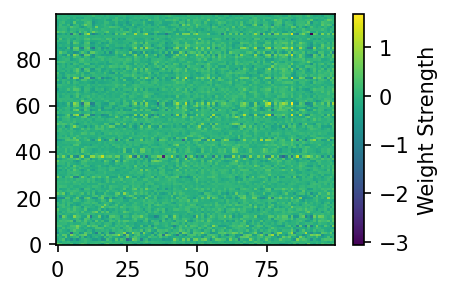

In [30]:
weight_matrix_fig0 = plot_rnn_weight_matrix(rnn_model0, pyal_dict0['regions_arr'], "M061_2025_03_04_10_00")

In [22]:
from scipy.stats import gaussian_kde

def weight_density_plot(rnn_model, session):
    start_matix = rnn_model['J0'].flatten()
    learned_matix = rnn_model['J'].flatten()

    # Calculate KDE
    kde_start = gaussian_kde(start_matix)
    x_range_start = np.linspace(min(start_matix), max(start_matix), 1000)
    kde_start_values = kde_start(x_range_start)

    kde_learn = gaussian_kde(learned_matix)
    x_range_learn = np.linspace(min(learned_matix), max(learned_matix), 1000)
    kde_learn_values = kde_learn(x_range_learn)

    # Plot
    fig, ax = plt.subplots(figsize=(4, 3))
    plt.plot(x_range_start, kde_start_values, color='grey', lw=2, label = "J0")
    plt.plot(x_range_learn, kde_learn_values, color='black', lw=2, label = "J")
    plt.xlabel('Weight')
    plt.ylabel('Density')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.title(f'Session {session}')
    plt.show()

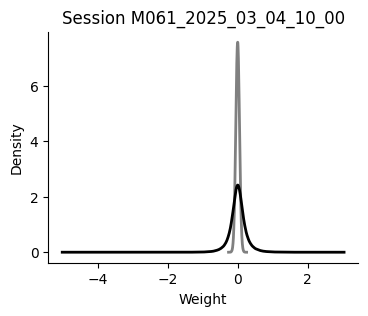

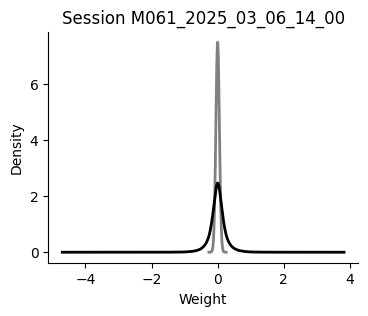

In [23]:
weight_density_plot(rnn_model0, "M061_2025_03_04_10_00")
weight_density_plot(rnn_model1, "M061_2025_03_06_14_00")

## Firing rate plots and heatmap

In [24]:
def plot_firing_rates(rnn_model, reset_points, mouse_num):
    rnn_model_ = rnn_model.copy()
    rnn_model_['RNN'] = rnnz.combine_rnn_time_bins(rnn_model)

    firing_rate_model = rnn_model_['RNN'].mean(axis=0)
    firing_rate_real = rnn_model_['Adata'].mean(axis=0)

    fig = plt.figure(figsize=(15, 3))
    plt.plot(firing_rate_model, label = "model")
    plt.plot(firing_rate_real, label = "experimental data")

    for trial in reset_points:
        if trial/2 < firing_rate_model.shape[0]:
            plt.axvline(x= trial/2, color='red', linestyle='--', linewidth=1, label = 'trial start' if trial==0 else "")

    plt.xlabel("Time points")
    plt.ylabel("Firing rate")
    plt.title(f"Firing rate over concatenated trial types - Mouse {mouse_num}")
    plt.legend(loc="upper right")
    plt.show()
    return fig

def plot_avg_firing_rates(rnn_model, original_shapes, perturbation_time, bin_size, mouse_num):
    rnn_model_ = rnn_model.copy()
    rnn_model_['RNN'] = rnnz.combine_rnn_time_bins(rnn_model)

    # Split and reshape data
    reconstructed_rnn = np.split(rnn_model_['RNN'].T, np.cumsum(original_shapes)[:-1])
    reconstructed_data_avg = np.split(rnn_model_['Adata'].T, np.cumsum(original_shapes)[:-1])
    reconstructed_rnn = np.array(reconstructed_rnn)  # shape: (trials, time, neurons)
    reconstructed_data_avg = np.array(reconstructed_data_avg)

    # Global firing rate
    firing_rate_model = reconstructed_rnn.mean(axis=(0, 2))
    firing_rate_real = reconstructed_data_avg.mean(axis=(0, 2))

    # Per-neuron average firing rate
    neuron_avg_model = reconstructed_rnn.mean(axis=0) 
    neuron_avg_real = reconstructed_data_avg.mean(axis=0) 

    # Time axis
    time = np.arange(0, neuron_avg_model.shape[0] * bin_size, bin_size)

    # Create subplots
    fig = plt.figure(figsize=(8, 4))
    gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])

    ax1 = fig.add_subplot(gs[:, 0])  # left
    ax2 = fig.add_subplot(gs[0, 1])  # Top-right
    ax3 = fig.add_subplot(gs[1, 1], sharex=ax2)  # Bottom-right sharing x-axis with ax2

    # --- Plot 1: Avg firing rate over time
    ax1.plot(time, firing_rate_model, label="Model")
    ax1.plot(time, firing_rate_real, label="Experimental data")
    ax1.axvline(x=perturbation_time, color='red', linestyle='--', linewidth=1, label='Perturbation')
    ax1.set_xlabel("Time (s)")
    ax1.set_ylabel("Firing rate")
    ax1.set_title(f"Avg. firing rate over time - Mouse {mouse_num}")
    ax1.legend()

    # --- Plot 2: Heatmap for experimental data
    im2 = ax2.imshow(neuron_avg_real.T, aspect='auto', cmap='viridis',
                     extent=[time[0], time[-1], 0, neuron_avg_real.shape[1]],
                     origin='lower', vmin=0, vmax=1)
    ax2.axvline(x=perturbation_time, color='red', linestyle='--', linewidth=1)
    ax2.set_ylabel("Neuron index")
    ax2.set_title("Experimental avg firing rate per neuron")
    ax2.set_xlim(1.5, 3)

    # --- Plot 3: Heatmap for model data
    im3 = ax3.imshow(neuron_avg_model.T, aspect='auto', cmap='viridis',
                     extent=[time[0], time[-1], 0, neuron_avg_model.shape[1]],
                     origin='lower', vmin=0, vmax=1)
    ax3.axvline(x=perturbation_time, color='red', linestyle='--', linewidth=1)
    ax3.set_xlabel("Time (s)")
    ax3.set_ylabel("Neuron index")
    ax3.set_title("Model avg firing rate per neuron")
    ax3.set_xlim(1.5, 3)
    
    cbar_ax = fig.add_axes([1, 0.15, 0.015, 0.7])
    cbar = fig.colorbar(im3, cax=cbar_ax)
    cbar.set_label("Firing rate")

    plt.tight_layout()
    plt.show()
    return fig

RNN model output transformed from shape: (810, 4799) to (810, 2400). Matching the original data shape of (810, 2400)


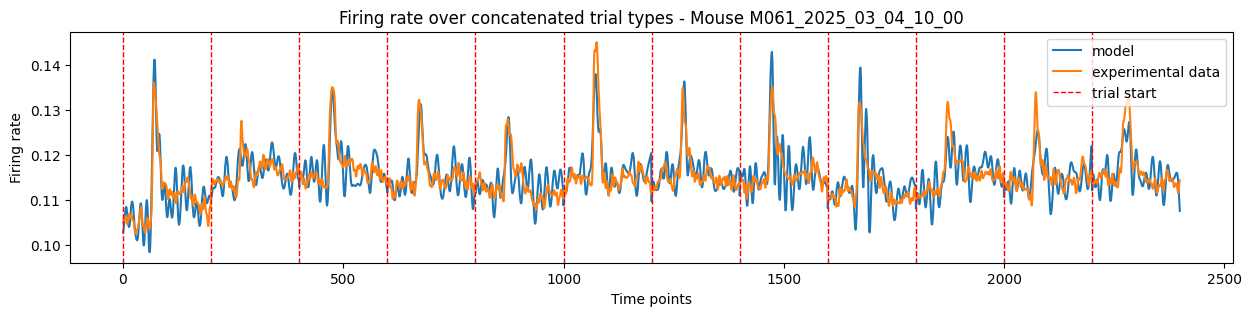

In [25]:
fr_fig = plot_firing_rates(rnn_model0, pyal_dict0['reset_points'], 'M061_2025_03_04_10_00')

RNN model output transformed from shape: (810, 4799) to (810, 2400). Matching the original data shape of (810, 2400)


/tmp/ipykernel_4193098/3196593100.py:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


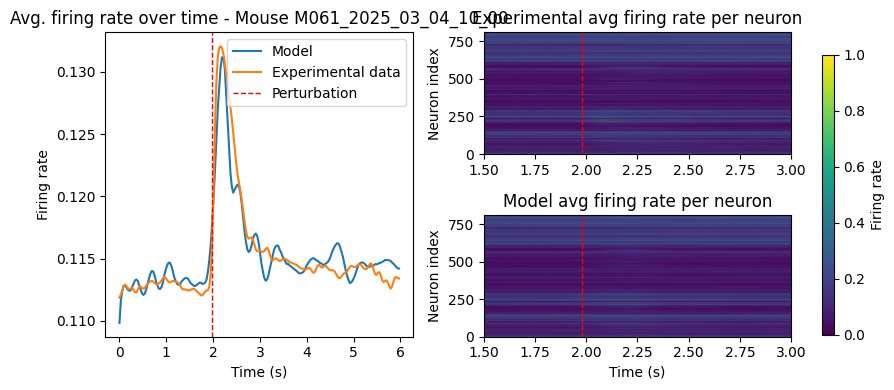

In [26]:
avg_fr_fig = plot_avg_firing_rates(rnn_model0, pyal_dict0['shapes'], pyal_dict0['perturbation_time_sec'], bin_size=rnn_model0['dtData'], mouse_num='M061_2025_03_04_10_00')

### For poster purposes

In [27]:
def plot_pca_by_region_3d(real_data, rnn_data, original_shapes, regions, mouse_num, df_data):
    num_plots = len(regions)
    labels = regions[:, 0]

    # Compute number of timepoints
    example_split = np.split(real_data[0], np.cumsum(original_shapes)[:-1])
    num_timepoints = min(arr.shape[0] for arr in example_split)

    # Generate colormaps
    colors = [
        plt.cm.Blues(np.linspace(0, 1, num_timepoints)),
        plt.cm.YlOrBr(np.linspace(0, 1, num_timepoints)),
        plt.cm.YlGn(np.linspace(0, 1, num_timepoints)),
        plt.cm.Reds(np.linspace(0, 1, num_timepoints)),
    ]

    re_real_data = []
    re_rnn_data = []

    for r in range(num_plots):
        re_real = np.split(real_data[r], np.cumsum(original_shapes)[:-1])
        re_rnn = np.split(rnn_data[r], np.cumsum(original_shapes)[:-1])

        def safe_mean(trial_list):
            shapes = [arr.shape for arr in trial_list]
            if len(set(shapes)) == 1:
                return np.mean(np.array(trial_list), axis=0)
            else:
                min_len = min(arr.shape[0] for arr in trial_list)
                truncated = np.array([arr[:min_len] for arr in trial_list])
                return np.mean(truncated, axis=0)

        mean_real = safe_mean(re_real)
        mean_rnn = safe_mean(re_rnn)

        re_real_data.append(mean_real)
        re_rnn_data.append(mean_rnn)

    fig = plt.figure(figsize=(4 * num_plots, 4), dpi=150)

    for r in range(num_plots):
        ax = fig.add_subplot(1, num_plots, r + 1, projection='3d')
        c = colors[r]

        # Plot experimental trajectory
        for t in range(re_real_data[r].shape[0] - 1):
            ax.plot(
                re_real_data[r][t:t+2, 0],
                re_real_data[r][t:t+2, 1],
                re_real_data[r][t:t+2, 2],
                color=c[t], linewidth=2, linestyle='--', alpha=0.9
            )

        # Plot model trajectory
        for t in range(re_rnn_data[r].shape[0] - 1):
            ax.plot(
                re_rnn_data[r][t:t+2, 0],
                re_rnn_data[r][t:t+2, 1],
                re_rnn_data[r][t:t+2, 2],
                color=c[t], linewidth=2
            )

        # ax.set_title(f"{labels[r]} activity", fontsize=12)
        ax.set_xticks([]); ax.set_yticks([]); ax.set_zticks([])
        ax.set_box_aspect([1, 1, 1])
        ax.view_init(elev=30, azim=135)

    # fig.suptitle(f"Mouse {mouse_num} - PCA Trajectories (3D Colored)", fontsize=14)
    fig.tight_layout()
    return fig

def poster_pca_regions_plt(rnn_model, pyal_dict, color_palette, mouse_num):
    rnn_model_ = rnn_model.copy()
    rnn_model_['RNN'] = rnnz.combine_rnn_time_bins(rnn_model)

    rnn_activity = rnn_model_['RNN'].T
    real_activity = rnn_model_['Adata'].T

    PCA_data_real, pcas_real = pca_by_region(real_activity, pyal_dict['regions_arr'])
    PCA_data_rnn, pcas_rnn = pca_by_region(rnn_activity, pyal_dict['regions_arr']) 
    _ = plot_pca_by_region_3d(PCA_data_real, PCA_data_rnn, pyal_dict['shapes'], pyal_dict['regions_arr'], color_palette, mouse_num)   

RNN model output transformed from shape: (792, 4799) to (792, 2400). Matching the original data shape of (792, 2400)


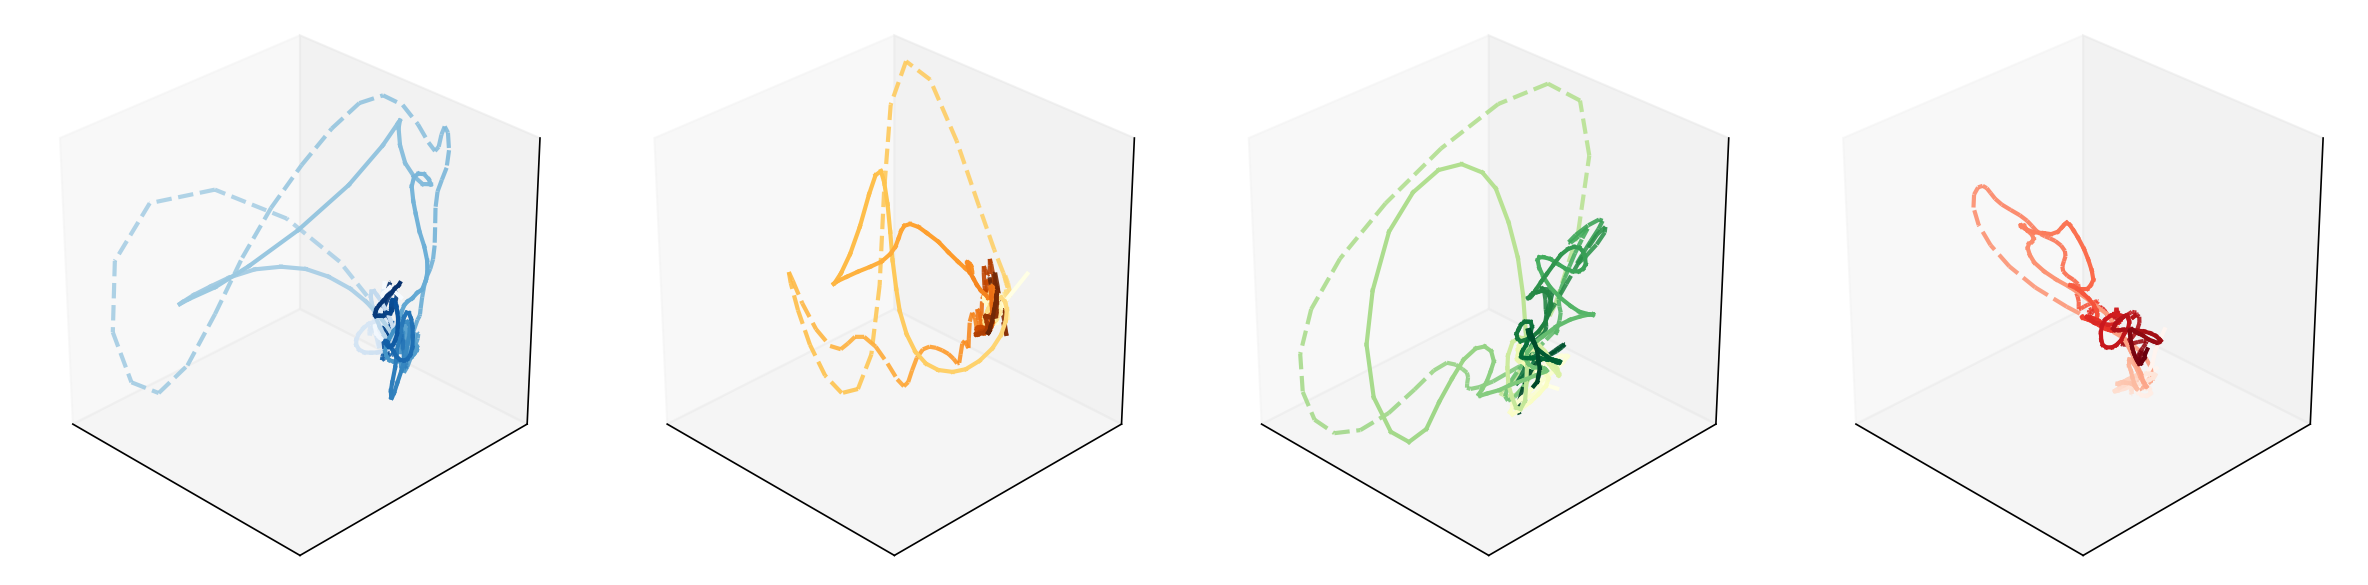

In [28]:
poster_pca_regions_plt(rnn_model1, pyal_dict1, color_palette,'M062_2025_03_20_14_00')